# Summary of Fan-In

Define the individual files for each Fan-In rate

In [8]:
ConfigFiles = {50:'../../results/GrCFanIn/EA_individuals_mfgrc_fanin_50.csv',
               100:'../../results/GrCFanIn/EA_individuals_mfgrc_fanin_100.csv',
               200:'../../results/GrCFanIn/EA_individuals_mfgrc_fanin_200.csv',
               500:'../../results/GrCFanIn/EA_individuals_mfgrc_fanin_500.csv',
               1000:'../../results/GrCFanIn/EA_individuals_mfgrc_fanin_1000.csv',
               2000:'../../results/GrCFanIn/EA_individuals_mfgrc_fanin_2000.csv'}
number_of_parameters = 2
number_of_features = 2
parameters_to_plot_2D = [0,1]
labels = ['MF-GrC Max Weight (nS)', 'MF-GrC LTD/LTP ratio']
import numpy
import matplotlib.pyplot as plt

Load the configuration files and store the information transmission and parameters

In [20]:
FanIn = ConfigFiles.keys()
InfRatio = []
MaxWeight = []
LTDRatio = []
for fanin,filename in ConfigFiles.iteritems():
    data = numpy.loadtxt(filename)
    print 'Fanin',fanin,'Loaded',data.shape[1],'columns and',data.shape[0],'rows'
    parameters = data[:,:number_of_parameters]
    output = data[:,number_of_parameters:]
    hall_of_fame = numpy.argsort(output[:,0])[-1]
    print "Parameters:",parameters[hall_of_fame,:],"Features:",output[hall_of_fame,:]
    InfRatio.append(output[hall_of_fame,0])
    MaxWeight.append(parameters[hall_of_fame,0])
    LTDRatio.append(parameters[hall_of_fame,1])
sortfanin = numpy.argsort(FanIn)
FanIn = numpy.array(FanIn)[sortfanin]
InfRatio = numpy.array(InfRatio)[sortfanin]
MaxWeight = numpy.array(MaxWeight)[sortfanin]
LTDRatio = numpy.array(LTDRatio)[sortfanin]

Fanin 100 Loaded 4 columns and 842 rows
Parameters: [4.86629616e-10 1.21432115e+00] Features: [0.10833817 0.00324871]
Fanin 200 Loaded 4 columns and 2894 rows
Parameters: [3.38125657e-10 1.04913431e+00] Features: [0.30503917 0.00066225]
Fanin 2000 Loaded 4 columns and 3664 rows
Parameters: [5.25571673e-11 8.64375399e-01] Features: [0.68259314 0.01624488]
Fanin 1000 Loaded 4 columns and 3617 rows
Parameters: [1.03241742e-10 1.00943726e+00] Features: [0.633966   0.02975778]
Fanin 50 Loaded 4 columns and 993 rows
Parameters: [5.85073844e-10 1.39872048e+00] Features: [0.04281146 0.02322365]
Fanin 500 Loaded 4 columns and 1774 rows
Parameters: [1.71375661e-10 1.04768603e+00] Features: [0.53975494 0.01734329]


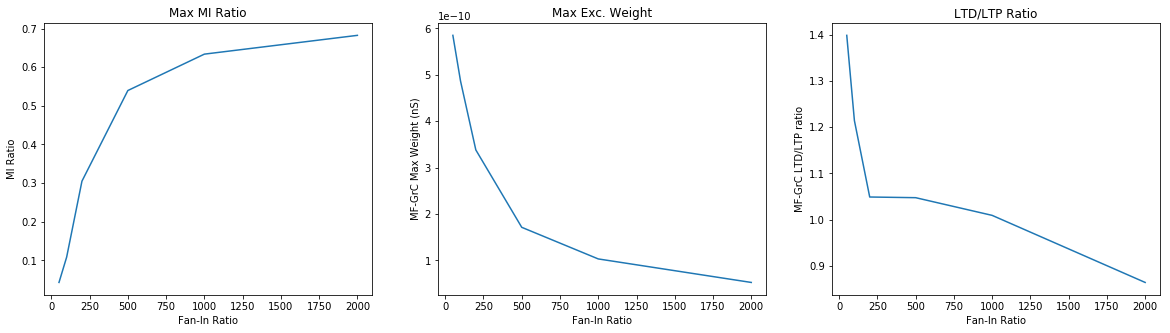

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(FanIn,InfRatio)
plt.title('Max MI Ratio')
plt.xlabel('Fan-In Ratio')
plt.ylabel('MI Ratio')
plt.subplot(1,3,2)
plt.plot(FanIn,MaxWeight)
plt.title('Max Exc. Weight')
plt.xlabel('Fan-In Ratio')
plt.ylabel(labels[0])
plt.subplot(1,3,3)
plt.plot(FanIn,LTDRatio)
plt.title('LTD/LTP Ratio')
plt.xlabel('Fan-In Ratio')
plt.ylabel(labels[1])
plt.show()